Import libraries

In [6]:
# data handling
import pandas as pd
import numpy as np

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize

In [8]:
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [10]:
# classification
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [90]:
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy

Read Data

In [12]:
def read_file(location):
    with open(os.path.expanduser(location), "r") as file:
        return pd.read_csv(file)

malaria_df = read_file("~/Desktop/malaria ML/malaria_clin_data.csv")

Data exploration and Data Cleaning

In [14]:
malaria_df

,SampleID,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,CCS20043,yes,Navrongo,2004,NaN,Yes,38.0,Not Known / Missing entry,NaN,Positive,...,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,CCS20102,yes,Navrongo,2004,NaN,Yes,38.2,Not Known / Missing entry,NaN,Positive,...,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,CCS20106,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,CCS20147,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,CCS20170,yes,Navrongo,2004,NaN,Yes,37.1,Not Known / Missing entry,NaN,Positive,...,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,KC366,yes,Kintampo,2017,yes,No,37.1,Bacteria/Protozoa,Malaria/LRTI,Positive,...,277.0,12.3,7.1,71.3,22.6,6.1,8.9,2.7,0.7,16.1
2203,KC368,yes,Kintampo,2017,no,No,36.7,Bacteria/Protozoa,Helminthiasis,Negative,...,340.0,15.2,7.2,73.6,21.0,5.4,6.0,1.7,0.4,15.1
2204,KC369,yes,Kintampo,2017,yes,No,36.4,Bacteria,Dermatitis,Negative,...,300.0,14.3,6.5,43.6,49.4,7.0,4.3,4.6,0.6,18.2
2205,KC370,yes,Kintampo,2017,yes,No,37.4,Not Known / Missing entry,URTI,Negative,...,136.0,13.3,7.1,35.3,58.1,6.6,4.4,7.1,0.8,14.2


In [26]:
print(np.shape(malaria_df))

(2207, 34)


In [28]:
malaria_df.head(n=3)

,SampleID,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,CCS20043,yes,Navrongo,2004,NaN,Yes,38.0,Not Known / Missing entry,NaN,Positive,...,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,CCS20102,yes,Navrongo,2004,NaN,Yes,38.2,Not Known / Missing entry,NaN,Positive,...,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,CCS20106,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0


In [22]:
malaria_df.columns 

Index(['SampleID', 'consent_given', 'location', 'Enrollment_Year', 'bednet',
       'fever_symptom', 'temperature', 'Suspected_Organism',
       'Suspected_infection', 'RDT', 'Blood_culture', 'Urine_culture',
       'Taq_man_PCR', 'parasite_density', 'Microscopy', 'Laboratory_Results',
       'Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [34]:
# taking subsets -> we want clinical diagnosis up to RBC_dist_width_Percent
# select subsets from col (n = 16) to n^-1
subset = malaria_df.iloc[:,16:]

In [36]:
# handling missing values
# remove missing values
subset.dropna(inplace = True)

In [40]:
print(np.shape(subset))

(2156, 18)


In [42]:
subset["Clinical_Diagnosis"].unique() # different types of malaria infections -> classification?

array(['Severe Malaria', 'Uncomplicated Malaria', 'Non-malaria Infection'],
      dtype=object)

Data preprocessing (appropriate formatting)

In [52]:
# separate classes from features
X = subset.iloc[:,1:]
y = subset.iloc[:,0]

In [54]:
# encode target labels (y) -> categorical -> discrete or continuous
label_encoder = LabelEncoder()
label_encoder.fit(y)
y = label_encoder.transform(y)
labels = label_encoder.classes_
classes = np.unique(y)
y = label_binarize(y, classes = np.unique(y))
nclasses = y.shape[1]

In [56]:
y[0]

array([0, 1, 0])

In [62]:
subset["Clinical_Diagnosis"].head(n = 1)

0    Severe Malaria
Name: Clinical_Diagnosis, dtype: object

In [66]:
labels # represent categories and assign values on the array depending if True or False

array(['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria'],
      dtype=object)

In [70]:
np.argmax(y[0]) # prints max index

1

In [72]:
labels[1]

'Severe Malaria'

Data Splitting

In [74]:
# split test data, validation and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# split training into tr and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

Data Normalisation (reduce the scale to 0 - 1)

In [82]:
# forgot to import it!
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_val = min_max_scaler.fit_transform(X_val)
X_test = min_max_scaler.fit_transform(X_test)

Build Neural Network

In [103]:
# Define the model
model = Sequential()

# Input layer
model.add(Input(shape=(X_train.shape[1],)))

# Hidden layer 1
model.add(Dense(40, activation='relu'))

# Hidden layer 2
model.add(Dense(20, activation='relu'))

# Output layer
model.add(Dense(nclasses, activation='softmax'))

# Define optimizer and learning rate
opt_adam = Adam(learning_rate=0.001)
model.compile(
    loss=CategoricalCrossentropy(),
    optimizer=opt_adam,
    metrics=[CategoricalAccuracy()]
)

In [107]:
# fit the model to the training data
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 32, epochs = 200, verbose = 1)

Epoch 1/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - categorical_accuracy: 0.3731 - loss: 1.0837 - val_categorical_accuracy: 0.4580 - val_loss: 0.9546
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.4654 - loss: 0.9432 - val_categorical_accuracy: 0.6957 - val_loss: 0.8667
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.6402 - loss: 0.8063 - val_categorical_accuracy: 0.7072 - val_loss: 0.7511
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.7005 - loss: 0.7065 - val_categorical_accuracy: 0.7159 - val_loss: 0.7188
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.7576 - loss: 0.6384 - val_categorical_accuracy: 0.7449 - val_loss: 0.6579
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.7569 - loss: 0.5872 - val_categorical_accuracy: 0.7710 - val_loss: 0.6133
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.7765 - loss: 0.56

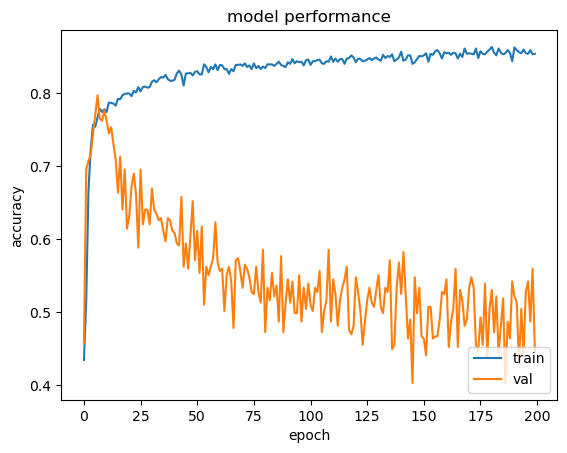

In [117]:
# visualise the model and how it performs during training (accuracy)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

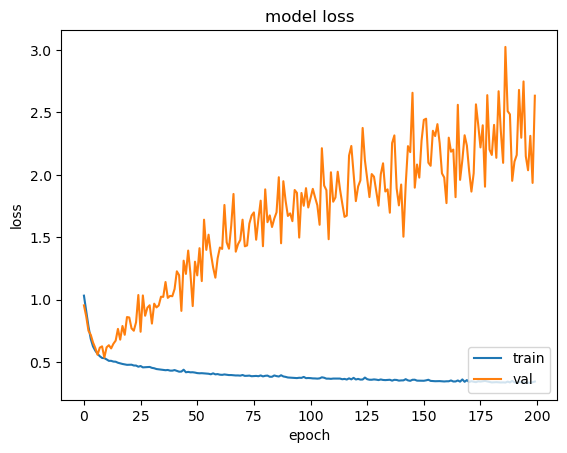

In [126]:
# summarise history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()